<a href="https://colab.research.google.com/github/goliharini19/DATA-MINING/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Load and Visualize the Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Salary_Data.csv')
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


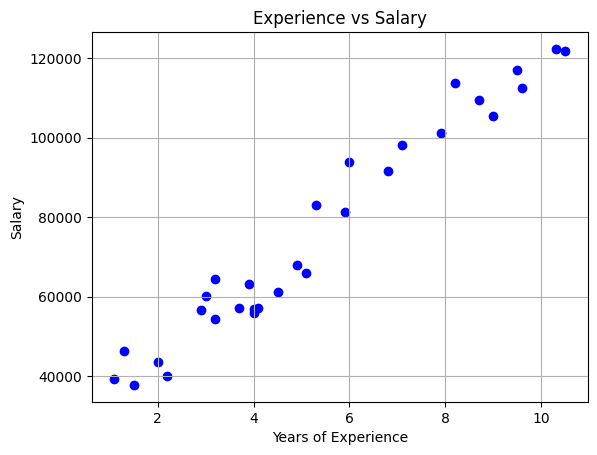

In [2]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

**Task 2: Apply Polynomial Regression**

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df[['YearsExperience']].values
y = df['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

**Task 3: Evaluate and Visualize**

In [5]:
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 12768977.981323855
R² Score: 0.9882197351491804


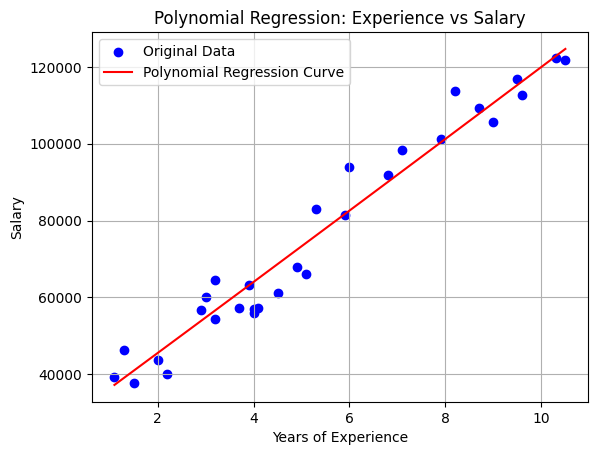

In [7]:
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()